In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/kaggle/input/gender-classification-dataset/gender_classification_v7.csv')
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [13]:
data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,0
1,0,14.0,5.4,0,0,1,0,1
2,0,11.8,6.3,1,1,1,1,0
3,0,14.4,6.1,0,1,1,1,0
4,1,13.5,5.9,0,0,0,0,1
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,1
4997,1,11.9,5.4,0,0,0,0,1
4998,1,12.9,5.7,0,0,0,0,1
4999,1,13.2,6.2,0,0,0,0,1


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 351.6 KB


In [6]:
data['gender'].value_counts()

Female    2501
Male      2500
Name: gender, dtype: int64

In [21]:
data['gender'] = data['gender'].replace({'Male': 0, 'Female': 1})

In [8]:
data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,0
1,0,14.0,5.4,0,0,1,0,1
2,0,11.8,6.3,1,1,1,1,0
3,0,14.4,6.1,0,1,1,1,0
4,1,13.5,5.9,0,0,0,0,1
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,1
4997,1,11.9,5.4,0,0,0,0,1
4998,1,12.9,5.7,0,0,0,0,1
4999,1,13.2,6.2,0,0,0,0,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 312.7 KB


In [10]:
data.shape

(5001, 8)

<AxesSubplot:>

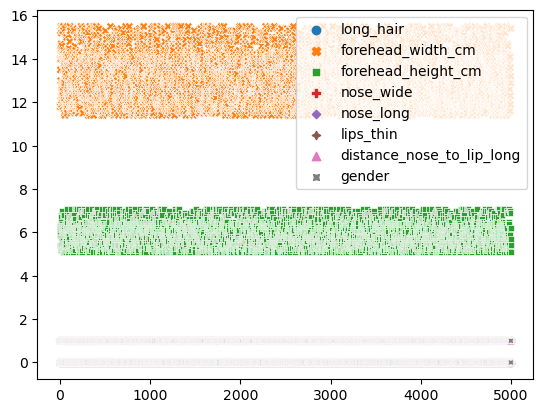

In [11]:
# detect and remove outliers
sns.scatterplot(data)

<AxesSubplot:>

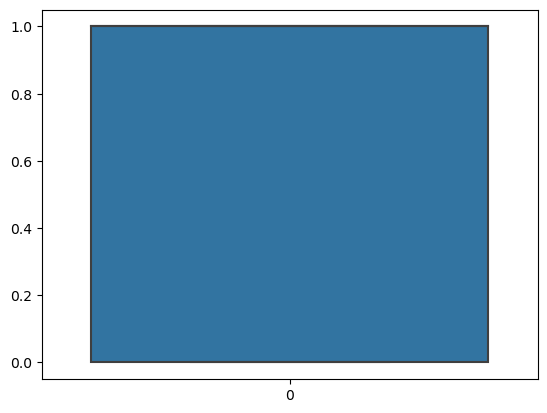

In [22]:
sns.boxplot(data['gender'])

In [23]:
def remove_outliers(df, cols, z_thresh):
    z_scores = df[cols].apply(lambda x: np.abs((x - x.mean()) / x.std()))
    cleaned_df = df[(z_scores < z_thresh).all(axis = 1)]
    return cleaned_df

In [24]:
cols = ['long_hair', 'gender']
z_thresh = 3
cleaned_data = remove_outliers(data, cols, z_thresh)

In [25]:
cleaned_data.to_csv('cleaned_data.csv')

In [26]:
cleaned_data = pd.read_csv('cleaned_data.csv')

In [27]:
from sklearn.model_selection import train_test_split
X = cleaned_data.drop(columns = ['gender'])
y = cleaned_data['gender']

In [29]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X, y = sm.fit_resample(X, y)

In [30]:
X.shape

(5002, 8)

In [31]:
y.shape

(5002,)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [33]:
from xgboost import XGBRFClassifier
xg = XGBRFClassifier()

In [34]:
xg.fit(X_train, y_train)

XGBRFClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                colsample_bylevel=1, colsample_bytree=1,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
                importance_type=None, interaction_constraints='', max_bin=256,
                max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
                max_leaves=0, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=0,
                num_parallel_tree=100, objective='binary:logistic',
                predictor='auto', random_state=0, reg_alpha=0,
                sampling_method='uniform', scale_pos_weight=1, ...)

In [35]:
y_pred = xg.predict(X_test)

In [36]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score
classification_report = classification_report(y_test, y_pred)
accuracy_score = accuracy_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

In [37]:
classification_report

'              precision    recall  f1-score   support\n\n           0       0.98      0.94      0.96       509\n           1       0.94      0.98      0.96       492\n\n    accuracy                           0.96      1001\n   macro avg       0.96      0.96      0.96      1001\nweighted avg       0.96      0.96      0.96      1001\n'

In [38]:
accuracy_score

0.9590409590409591

In [39]:
recall_score

0.983739837398374

In [40]:
f1_score

0.9593657086223984